In [1]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import torch
import matplotlib.pyplot as plt
%matplotlib inline

env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe",no_graphics=True)
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

action_size = brain.vector_action_space_size
env_info = env.reset(train_mode=True)[brain_name]
state = env_info.vector_observations[0]
state_size = len(state)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [2]:
from dqn_agent import Agent

agent = Agent(state_size, action_size, seed=0)
agent.qnetwork_local.load_state_dict(torch.load('./weights/checkpoint_trained_519_episodes.pth'))

In [3]:
def run(n_episodes=2000):
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    moves = []                        # list containing scores from each episode
    moves_window = deque(maxlen=100) 
    for i_episode in range(1, n_episodes+1):
        #print("****EPISODE******",i_episode)
        env_info = env.reset(train_mode=True)[brain_name]
        #print()
        #print("****RESET*****")
        state = env_info.vector_observations[0]       
        score = 0
        move = 0
        while True:
            action = agent.act(state)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0] 
            state = next_state
            score += reward
            move += 1
            if done:
                #print("*****DONE*******")
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        moves_window.append(move)       # save most recent score
        moves.append(move)   
        
        print('\rEpisode {}\tAverage Score: {:.2f} Average Moves: {:.2f}'.format(i_episode, np.mean(scores_window),np.mean(moves_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f} Average Moves: {:.2f}'.format(i_episode, np.mean(scores_window),np.mean(moves_window)))
        
    return scores

Episode 100	Average Score: 11.41 Average Moves: 300.00
Episode 200	Average Score: 11.51 Average Moves: 300.00
Episode 300	Average Score: 11.41 Average Moves: 300.00
Episode 400	Average Score: 12.00 Average Moves: 300.00
Episode 500	Average Score: 10.77 Average Moves: 300.00
Episode 600	Average Score: 11.59 Average Moves: 300.00
Episode 700	Average Score: 11.52 Average Moves: 300.00
Episode 800	Average Score: 11.42 Average Moves: 300.00
Episode 900	Average Score: 10.53 Average Moves: 300.00
Episode 1000	Average Score: 11.06 Average Moves: 300.00
Episode 1100	Average Score: 10.49 Average Moves: 300.00
Episode 1200	Average Score: 10.07 Average Moves: 300.00
Episode 1300	Average Score: 11.72 Average Moves: 300.00
Episode 1400	Average Score: 10.77 Average Moves: 300.00
Episode 1500	Average Score: 10.95 Average Moves: 300.00


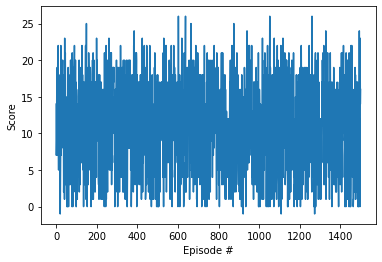

In [4]:
scores = run(1500)
env.close()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()